### データ理解

In [127]:
classes = {
    0 : 'L',
    1 : 'O',
    2 : 'V',
    3 : 'E',
}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [128]:
import tensorflow as tf

x_train = tf.constant(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ]
)

In [129]:
x_train.shape

TensorShape([4, 5, 5])

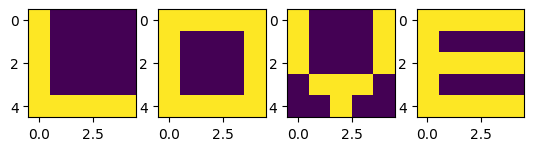

In [130]:
import matplotlib.pyplot as plt

words = x_train.shape[0]

for i in range(words):
    plt.subplot(1, words, i+1)
    plt.imshow(x_train[i])
plt.show()

In [131]:
y_train = tf.constant([0., 1., 2., 3.])

### モデル構築

In [132]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = tf.keras.layers.Dense(32)
        self.fc2 = tf.keras.layers.Dense(32)
        self.fc3 = tf.keras.layers.Dense(4)

    def call(self, x):
        x = self.flatten(x)
        x = tf.nn.relu(self.fc1(x))
        x = tf.nn.relu(self.fc2(x))
        x = tf.nn.softmax(self.fc3(x))
        return x

In [133]:
model = Model()
model(x_train)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.24021375, 0.15627357, 0.11048231, 0.4930303 ],
       [0.20052254, 0.12928183, 0.08055104, 0.58964455],
       [0.22455359, 0.2553187 , 0.16065334, 0.35947436],
       [0.23585024, 0.13117388, 0.11236658, 0.5206093 ]], dtype=float32)>

### ハイパーパラメータ設定

In [134]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
epochs = 100

### 訓練

In [135]:
model.compile(loss=loss_fn, optimizer=optimizer)
hist = model.fit(x_train, y_train, epochs=epochs)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.4883
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4505
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4137
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 1.3785
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1.3457
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3132
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 1.2828
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 1.2536
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 1.2251
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1990
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 1.1735
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 1.1485
Epoch 13/100
1/1 [==============================] - 0s 8ms/ste

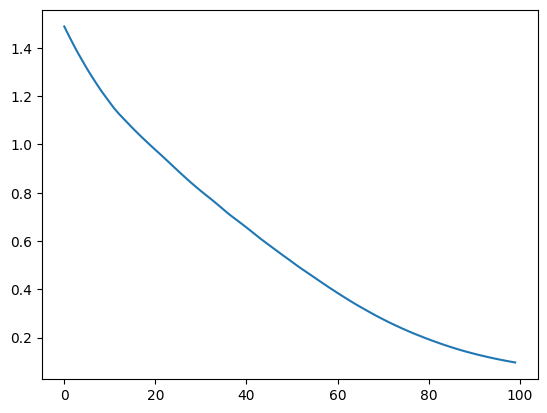

In [136]:
plt.plot(hist.history['loss'])
plt.show()

### 推論

In [137]:
x_pred = tf.constant(
    [
        [
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 0., 0., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 1., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 1., 1.],
            [1., 1., 1., 1., 1.],
        ],
        [
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [1., 0., 0., 0., 1.],
            [0., 1., 1., 1., 0.],
            [0., 0., 1., 0., 0.],
        ],
        [
            [1., 1., 1., 1., 1.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 0.],
            [1., 0., 0., 0., 0.],
            [1., 1., 1., 1., 1.],
        ],
    ]
)

In [138]:
y_pred = model.predict(x_pred)
[classes[y] for y in tf.math.argmax(y_pred, axis=1).numpy()]

1/1 [==============================] - 0s 55ms/step


['L', 'O', 'V', 'E']